# Regresion Lineal

In [1]:
# Carguemos modulos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning : Scikit-Learn
# Datos listos para construir modelos
# Particionamiendo del conjunto de datos : train/test
# Instanciamos la clase a modelar
# Ajustamos el modelo : Clase a modelar + Subconjunto de datos de entrenamiento
# Calculo de algunos indicadores de calidad :
  # R2 (score)
  # Construccion de pronosticos + KPI

# Particionado de los datos
from sklearn.model_selection import train_test_split

# Seleccionar la naturaleza del modelo a ajustar : Modelo de regresion lineal
from sklearn.linear_model import LinearRegression

# Submodulo metrics : Varios indicadores de calidad (problemas de regresion, clasificacion y clustering)
from sklearn import metrics

# Dataset
datos = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/marketing.csv")
print(datos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    200 non-null    float64
 1   facebook   200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [2]:
# Nombres de las columnas
datos.columns

# Recomendaciones :
  # Los nombres de las columnas no deben contener espacios en blanco
  # Los nombres de las columnas no deben contener el caracter /
  # Los nombres de las columnas no deben contener caracteres compuestos

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [3]:
# Valores faltantes
datos.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


In [4]:
# Definamos las variables a utilizar para construir el modelo
y = datos.sales
X = datos.drop("sales", axis = 1)

In [7]:
# Construyamos un modelo de regresion lineal  : coef1*youtube + coef2*facebook + coef3*newspaper + b = sales

# Particionamiendo del conjunto de datos : train/test
X_train, X_test , ytrain, ytest = train_test_split(X, y, test_size = 0.2)

# Instanciamos la clase LinearRegression
model_LinReg_Base = LinearRegression()

# Ajustamos el modelo instanciado usando los datos de entrenamiento
model_LinReg_Base.fit(X_train, ytrain)

# R2
R2_model_LinReg_Base = model_LinReg_Base.score(X_train, ytrain)

# Pronosticos de la variable dependiente : modelo instanciado + subconjunto de testeo de la variable independiente
y_pronostico_RegLin = model_LinReg_Base.predict(X_test)

# Calculo un indicador de calidad : MAPE
MAPE_model_LinReg_Base = metrics.mean_absolute_percentage_error(ytest, y_pronostico_RegLin)*100

print("""
Modelo de Regresion Lineal (marketing)
  R2 : %.3f
  MAPE : %.3f
""" %(R2_model_LinReg_Base, MAPE_model_LinReg_Base))


Modelo de Regresion Lineal (marketing)
  R2 : 0.901
  MAPE : 13.210



In [8]:
# Empaquetemos los calculos de la celda anterior para analizar la estabilidad del
# modelo de regresion lineal

def Stability_RegLin():
  # Particionamiendo del conjunto de datos : train/test
  X_train, X_test , ytrain, ytest = train_test_split(X, y, test_size = 0.2)

  # Instanciamos la clase LinearRegression
  model_LinReg_Base = LinearRegression()

  # Ajustamos el modelo instanciado usando los datos de entrenamiento
  model_LinReg_Base.fit(X_train, ytrain)

  # R2
  R2_model_LinReg_Base = model_LinReg_Base.score(X_train, ytrain)

  # Pronosticos de la variable dependiente : modelo instanciado + subconjunto de testeo de la variable independiente
  y_pronostico_RegLin = model_LinReg_Base.predict(X_test)

  # Calculo un indicador de calidad : MAPE
  MAPE_model_LinReg_Base = metrics.mean_absolute_percentage_error(ytest, y_pronostico_RegLin)*100

  # output
  return (R2_model_LinReg_Base, MAPE_model_LinReg_Base)

In [18]:
# Ejecutemos nuestra funcion Stability_Reglin muchas veces (800) para observar
# que tan estable es la obtencion de indicadores de calidad para estos modelos
# ajustados

ListaR2 = []
ListaMAPE = []

for i in range(1500):
  R2, MAPE = Stability_RegLin()
  ListaR2.append(R2)
  ListaMAPE.append(MAPE)

In [10]:
#
ListaR2

[0.894994303337568,
 0.8947391473955104,
 0.8903720860455674,
 0.8982846308743194,
 0.8929797244208433,
 0.8926046685033993,
 0.8916633336677209,
 0.9019470282769265,
 0.8917045938154027,
 0.900698775345256,
 0.8931455532005372,
 0.8994236902334195,
 0.8891346212283947,
 0.8971578988344329,
 0.8986339754580274,
 0.9000291504086572,
 0.8827491387816985,
 0.9025795615011136,
 0.8956939719280234,
 0.8904930200232902,
 0.897683044990482,
 0.9110895369027814,
 0.895423095519864,
 0.9004944074347925,
 0.8951694036152427,
 0.8889354824801412,
 0.8945055521876241,
 0.8945401013267335,
 0.8998003368773854,
 0.9127184743561112,
 0.8958276961050108,
 0.8978246015497059,
 0.8904907418529202,
 0.8814194503374027,
 0.899482739841206,
 0.8893657325969117,
 0.8972888899529574,
 0.9106015657781537,
 0.8988974713638412,
 0.8998562248750899,
 0.9140553748953056,
 0.9037359250354082,
 0.8878663310937335,
 0.8935826912966615,
 0.9058374003982745,
 0.8855996131139817,
 0.9190166048868427,
 0.901072916575479

In [11]:
#
ListaMAPE

[12.325242475893287,
 9.378425467886307,
 10.774818415296108,
 13.32046899591472,
 8.884824939870613,
 8.220454525145797,
 9.739910593319316,
 13.764079153700173,
 10.832281116260448,
 10.594704960976635,
 11.213464651101045,
 12.202522727150908,
 11.405525464659124,
 9.724717173761647,
 12.529751209254622,
 11.032958391096734,
 13.446242916830329,
 11.73497076184164,
 12.350714218337725,
 9.699338163008228,
 11.503267536988412,
 25.37426593118545,
 9.875505423921776,
 12.81306583403316,
 11.651563877344255,
 9.88807005470274,
 13.586179627298206,
 9.599634090087806,
 14.614155642033003,
 25.67144317321171,
 13.288177258740314,
 22.195504968734667,
 11.031353253332679,
 11.402233828528034,
 15.510673079645123,
 9.124867499509511,
 12.624708358228792,
 15.346402469995004,
 10.765678980855679,
 15.693840681733784,
 25.221473834116498,
 10.695642845517003,
 9.374196513233887,
 11.962780418624734,
 11.568220896134692,
 9.19343794240472,
 26.753031148357177,
 14.75993772384608,
 9.366861005

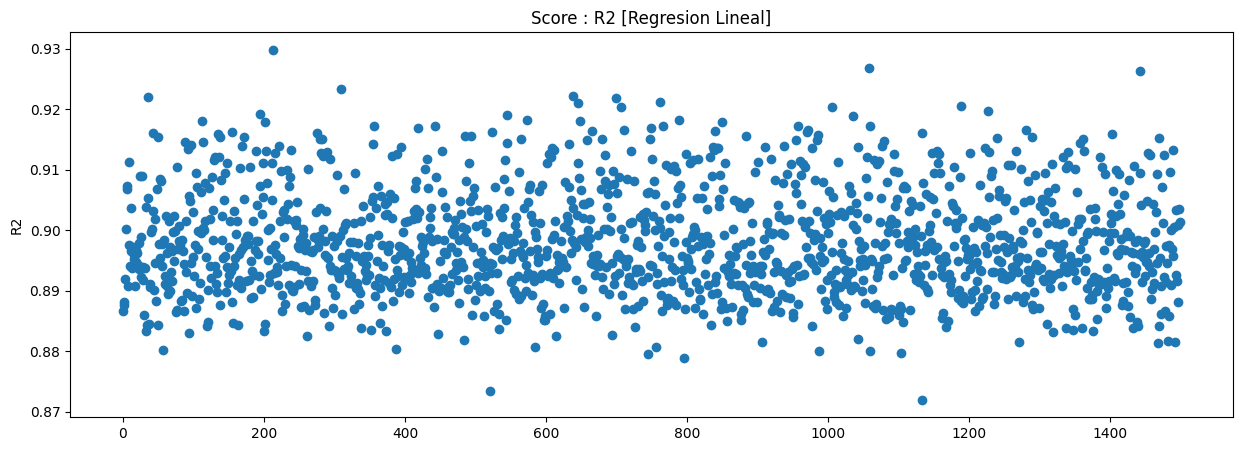

In [19]:
# Mostremos la distribucion de R2 (score)
plt.figure(figsize= (15,5))
plt.scatter(x = list(range(len(ListaR2))) , y = ListaR2)
plt.title("Score : R2 [Regresion Lineal]")
plt.ylabel("R2")
# plt.ylim((0,1))
plt.show()

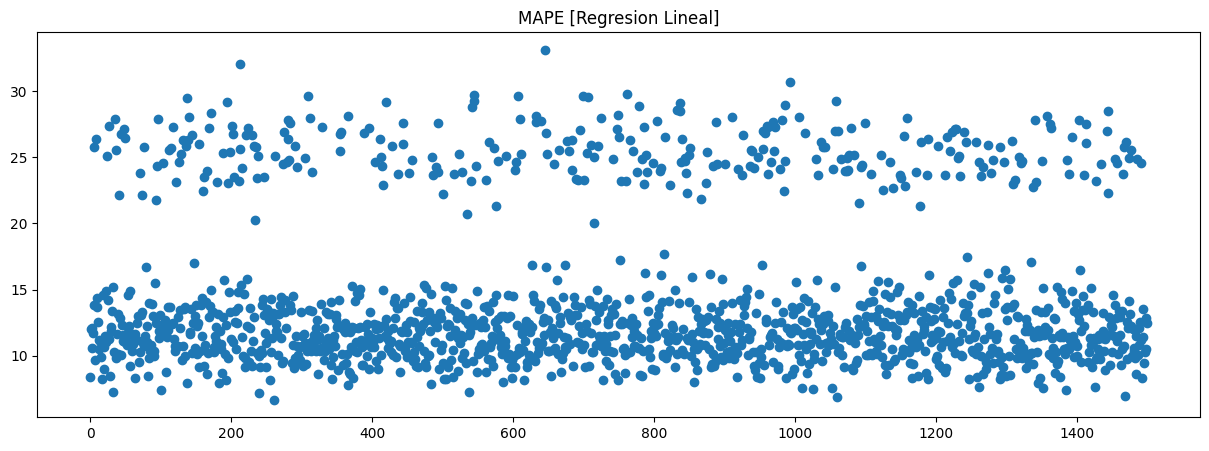

In [20]:
# Mostremos la distribucion de valores para el MAPE
plt.figure(figsize= (15,5))
plt.scatter(x = list(range(len(ListaMAPE))) , y = ListaMAPE)
plt.title("MAPE [Regresion Lineal]")
plt.show()

(array([129., 601., 402.,  69.,   2.,  16., 129., 117.,  32.,   3.]),
 array([ 6.65807107,  9.30709372, 11.95611637, 14.60513902, 17.25416167,
        19.90318432, 22.55220697, 25.20122962, 27.85025227, 30.49927492,
        33.14829757]),
 <BarContainer object of 10 artists>)

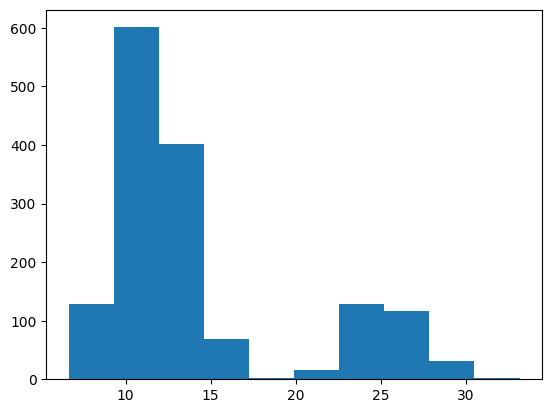

In [22]:
# Histograma para la lista de MAPE
plt.hist(ListaMAPE)


In [24]:
# Forma inferencial : Test de Normalidad
from scipy.stats import shapiro
shapiro(ListaMAPE)

# Como el pvalue < 0.05 => ListaMAPE no proviene de una distribucion normal

ShapiroResult(statistic=0.7747081092223138, pvalue=2.910470543659783e-41)

In [39]:
# Calculemos la varianza de ListaMAPE
np.var(ListaMAPE)

34.50233137107781

# Arboles de decision

In [25]:
#
from sklearn.tree import DecisionTreeRegressor

In [26]:
# Documentacion
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [29]:
# Instancia de la clase DecisionTreeRegressor
Model_dt_Base = DecisionTreeRegressor()

# PArticionado
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.80)

# Ajustamos ell modelo usando el subconjunto de entrenamiento
Model_dt_Base.fit(Xtrain, ytrain)

# Score
R2_dt_Base = Model_dt_Base.score(Xtrain, ytrain)

# Calculo de pronostico
y_pred_dt_Base = Model_dt_Base.predict(Xtest)

# KPI
MAPE_dt_base = metrics.mean_absolute_percentage_error(ytest, y_pred_dt_Base)*100

print("""
Modelo : Arbol de decision [Regresion]
  Score : %.3f
  MAPE  : %.3f
""" %(R2_dt_Base, MAPE_dt_base))


Modelo : Arbol de decision [Regresion]
  Score : 1.000
  MAPE  : 7.149



In [30]:
# Analicemos la estabilidad de los modelos de tipo arbol de decision
# para nuestro problema de regresion

def Stability_dt():
  # Instancia de la clase DecisionTreeRegressor
  Model_dt_Base = DecisionTreeRegressor()

  # PArticionado
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.80)

  # Ajustamos ell modelo usando el subconjunto de entrenamiento
  Model_dt_Base.fit(Xtrain, ytrain)

  # Score
  R2_dt_Base = Model_dt_Base.score(Xtrain, ytrain)

  # Calculo de pronostico
  y_pred_dt_Base = Model_dt_Base.predict(Xtest)

  # KPI
  MAPE_dt_base = metrics.mean_absolute_percentage_error(ytest, y_pred_dt_Base)*100

  # output
  return R2_dt_Base, MAPE_dt_base

In [34]:
# Ejecutemos varias veces (1500) nuestra funcion Stability_dt para analizar
# la estabilidad (volatilidad) de los indicadores de calidad

ListaR2_dt = []
ListaMAPE_dt = []

for k in range(3000):
  R2, MAPE = Stability_dt()
  ListaR2_dt.append(R2)
  ListaMAPE_dt.append(MAPE)

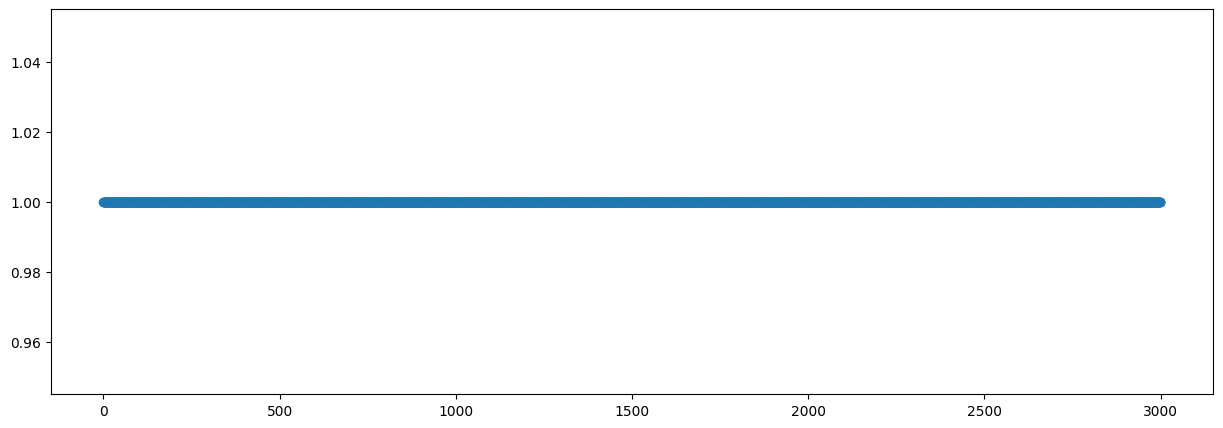

In [35]:
# Visualicemos la distribucion de los score de estos modelos de tipo Arbol de decision
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaR2_dt)) , y = ListaR2_dt)

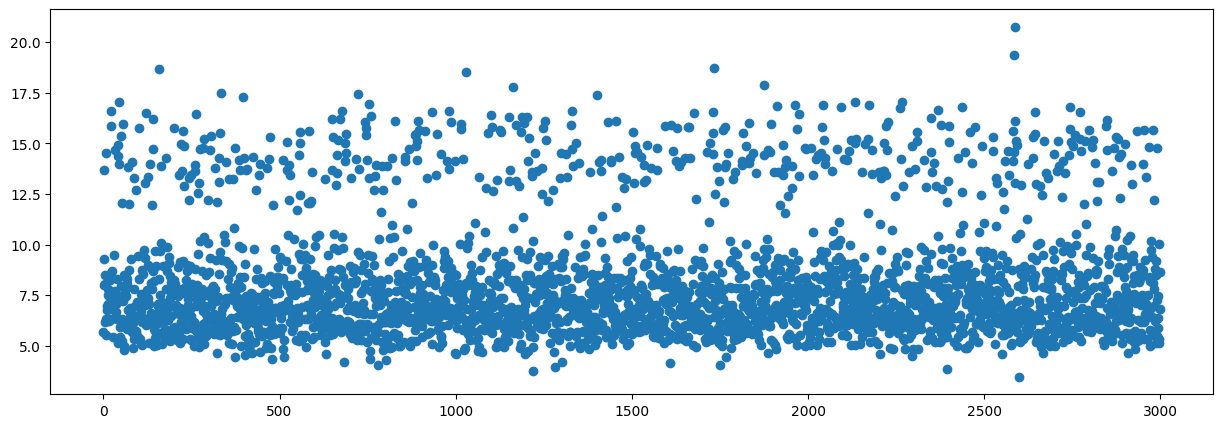

In [36]:
# Visualicemos la distribucion de los MAPE obtenidos (1500 experimentos)
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaMAPE_dt)), y = ListaMAPE_dt)

In [37]:
# Calculemos la varianza para estos modelos de tipo arbol de decision
np.var(ListaMAPE_dt)

8.484101644292563

In [40]:
# Documentacion de la clase DecisionTreeRegressor
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [42]:
# Analicemos los resultado obtenidos (score, mape) modificando el argumento criterion
# de la clase DecisionTreeRegressor
#

Lista_R2_criterion = []
Lista_MAPE_criterion = []

for arg_criterion in ["squared_error", "friedman_mse", "absolute_error", "poisson"]:
  Model_dt = DecisionTreeRegressor(criterion = arg_criterion)
  Lista_R2 = []
  ListaMAPE = []

  for k in range(3000):
    X_train, X_test, ytrain, ytest = train_test_split(X,y,train_size = 0.80)
    Model_dt.fit(X_train, ytrain)
    R2_model_dt = Model_dt.score(X_train, ytrain)
    y_pred_dt = Model_dt.predict(X_test)
    MAPE_dt = metrics.mean_absolute_percentage_error(ytest, y_pred_dt)*100
    Lista_R2.append(R2_model_dt)
    ListaMAPE.append(MAPE_dt)
  Lista_R2_criterion.append(Lista_R2)
  Lista_MAPE_criterion.append(ListaMAPE)

In [43]:
# Analicemos la varianza de cada una de las listas que compone a Lista_MAPE_criterion

var_squared_error = np.var(Lista_MAPE_criterion[0])
var_friedman_mse = np.var(Lista_MAPE_criterion[1])
var_absolute_error = np.var(Lista_MAPE_criterion[2])
var_poisson = np.var(Lista_MAPE_criterion[3])

print("""
Varianzas en funcion dell argumento criterion:
  squared_error : %.3f
  friedman_mse  : %.3f
  absolute_error : %.3f
  poisson : %.3f

""" % (var_squared_error, var_friedman_mse, var_absolute_error, var_poisson))





Varianzas en funcion dell argumento criterion:
  squared_error : 7.828
  friedman_mse  : 8.240
  absolute_error : 7.771
  poisson : 6.755




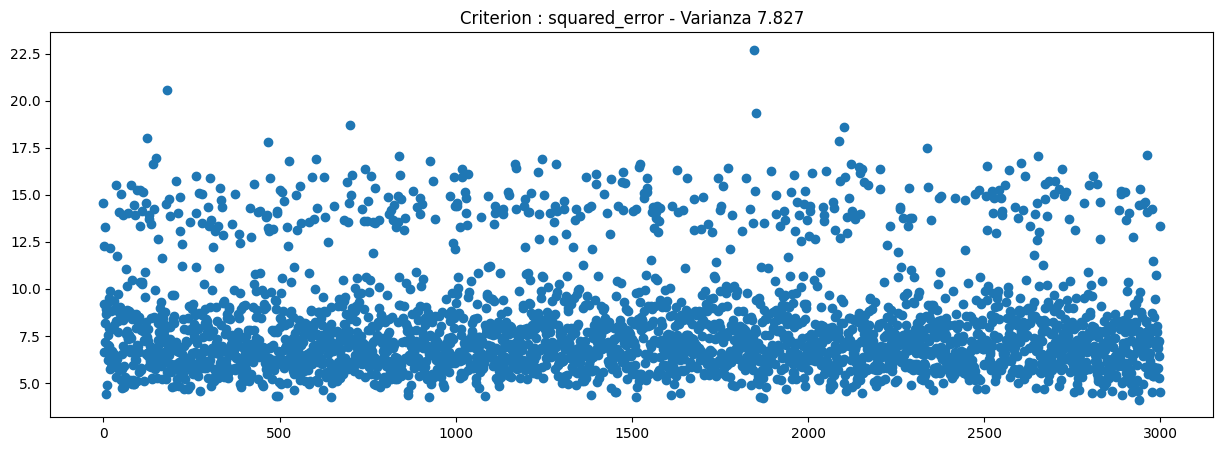

In [47]:
# Mostremos la distribucion de MAPE cuando criterion = squared_error
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(Lista_MAPE_criterion[0])), y = Lista_MAPE_criterion[0])
plt.title("Criterion : squared_error - Varianza " + str(var_squared_error)[:5] )
plt.show()

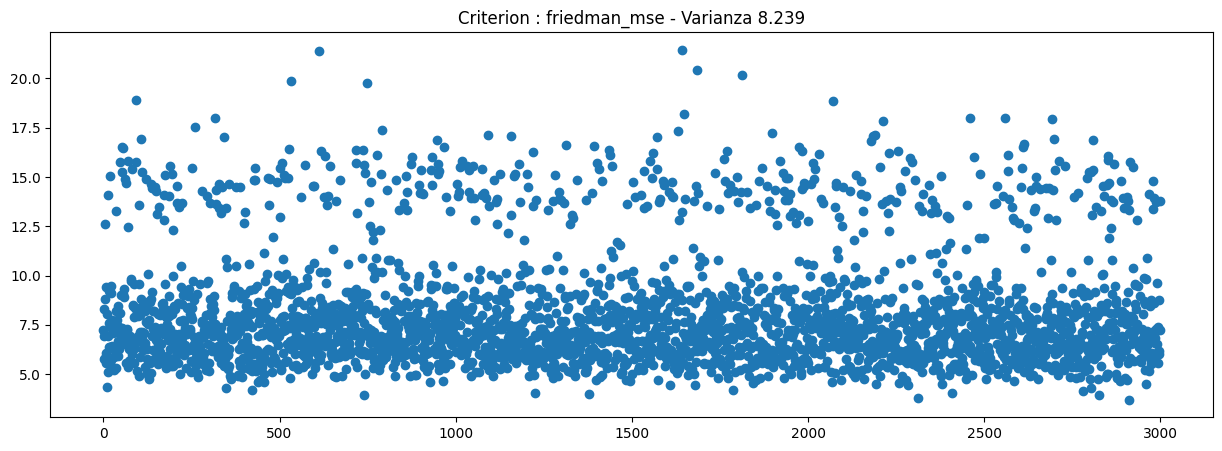

In [49]:
# Mostremos la distribucion de MAPE cuando criterion = friedman_mse
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(Lista_MAPE_criterion[1])), y = Lista_MAPE_criterion[1])
plt.title("Criterion : friedman_mse - Varianza " + str(var_friedman_mse)[:5] )
plt.show()

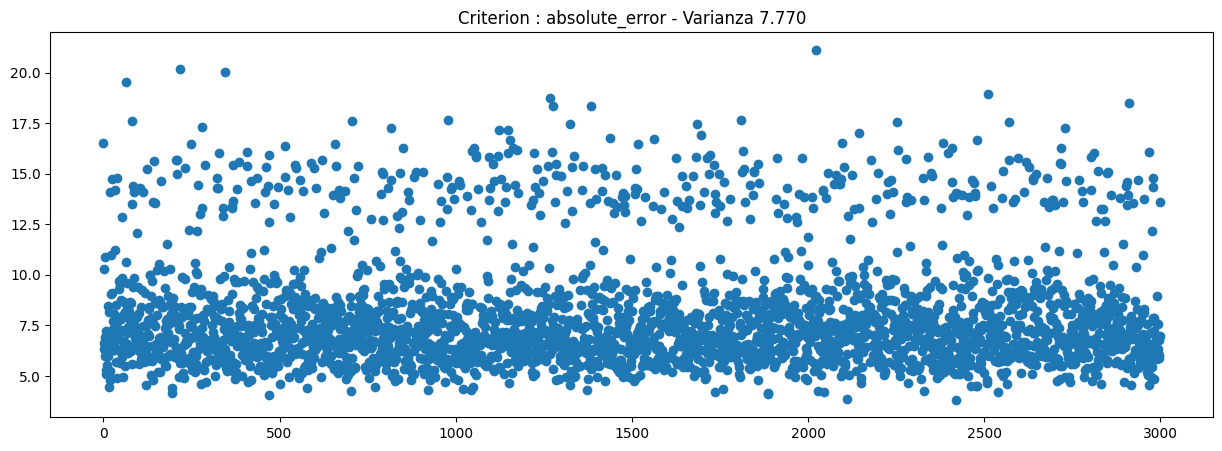

In [50]:
# Mostremos la distribucion de MAPE cuando criterion = absolute_error
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(Lista_MAPE_criterion[2])), y = Lista_MAPE_criterion[2])
plt.title("Criterion : absolute_error - Varianza " + str(var_absolute_error)[:5] )
plt.show()

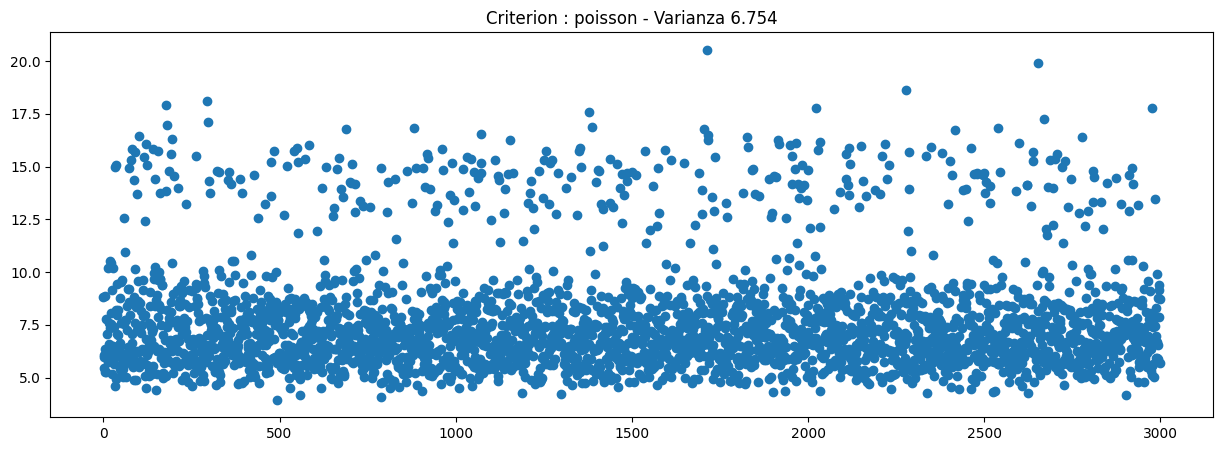

In [51]:
# Mostremos la distribucion de MAPE cuando criterion = poisson
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(Lista_MAPE_criterion[3])), y = Lista_MAPE_criterion[3])
plt.title("Criterion : poisson - Varianza " + str(var_poisson)[:5] )
plt.show()